# Analysis of Railroad defects identified during 2010-2012

<b>README</b>

* The following libraries are necessary to run this notebook
    - matplotlib
    - numpy
    - pandas
    - tabulate
    - scikit-learn
    

* Update settings variables *below* before executing the notebook


In [4]:
# Settings

_DATA_SOURCE_PATH = "/users/suryak/courses/bigdata-class/project"
_RAIL_DEFECTS_FILE_NAME = "rail_defects.csv"

In [6]:
from matplotlib import cm
from matplotlib import pyplot as plt
from collections import Counter
from tabulate import tabulate

import os
import numpy as np
import pandas as pd
import datetime as dt

def load_rail_data():
    # Load rail defects data
    filename = os.path.join(_DATA_SOURCE_PATH, _RAIL_DEFECTS_FILE_NAME)
    columns = [
        "division", "sub_division", "prefix", "milepost", "track_type", "track_code", 
        "side", "defect_type", "size", "date_found", "car_name", "prepared_by", 
        "curve_tang", "road_master", "joint_weld", "rolled_year", "mill", "weight",
        "mgt", "age", "cum_mgt"]
    column_types = [
        str, str, str, float, str, str, str, str, float, dt.date, str, str, str, str, str,
        float, str, float, float, float, float]
    dtype = dict([(c, t) for c, t in zip(columns, column_types)])
    rail_data = pd.read_csv(filename, names=columns, dtype=dtype, parse_dates=True, header=0)
    return rail_data

# Load the data
df = load_rail_data()

# Set matplotlib style
# plt.xkcd()


# Descriptive Statistics

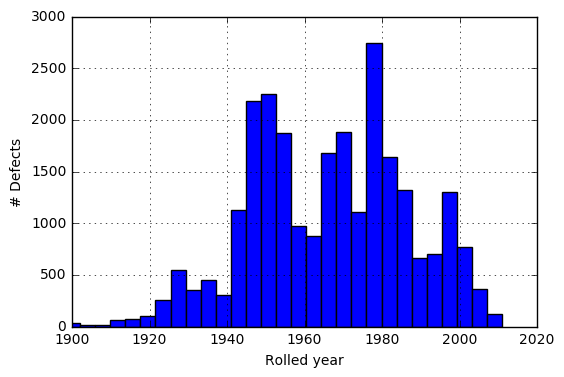

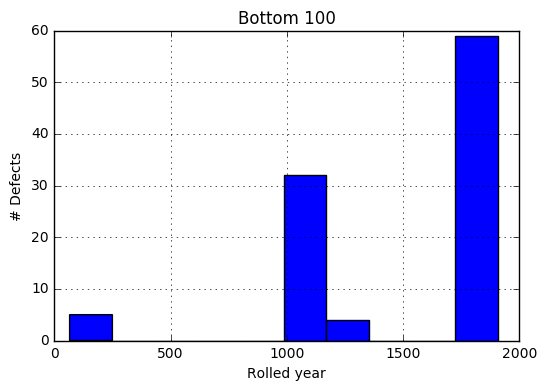

Rolled Year: Year at which rail section was installed
Mean:  1964.58743127
Variance:  2190.67512411
Standard Deviation:  46.804648531
Max Value:  2011.0
Min Value:  66.0
Unknow Values:  606


In [7]:
# Rolled year: Year in which rail sections were installed

fig, ax = plt.subplots()
rolled_year = df.rolled_year.dropna().sort_values()
rolled_year.hist(ax=ax, bins=500)
ax.set_xlim(1900, 2020)
ax.set_xlabel("Rolled year")
ax.set_ylabel("# Defects")
plt.show()

# Bottom 100 - Rolled Year
fig, ax = plt.subplots()
bottom_rolled_year = rolled_year[:100]
bottom_rolled_year.hist(ax=ax)
ax.set_xlabel("Rolled year")
ax.set_ylabel("# Defects")
ax.set_title("Bottom 100")
plt.show()

print "Rolled Year: Year at which rail section was installed" 
print "====================================================="
print "Mean: ", rolled_year.mean()
print "Variance: ", rolled_year.var()
print "Standard Deviation: ", rolled_year.std()
print "Max Value: ", rolled_year.max()
print "Min Value: ", rolled_year.min()
print "Unknow Values: ", len(df.rolled_year) - rolled_year.count()


## Notes

- **Outliers on the left side of histogram should be addressed**.

- **Around 600 records are identified with unknown values.**


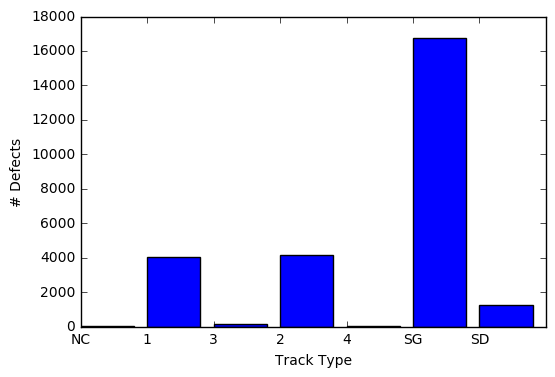

/Users/suryak/anaconda/lib/python2.7/site-packages/pandas/indexes/multi.py:610: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_value(s, k)


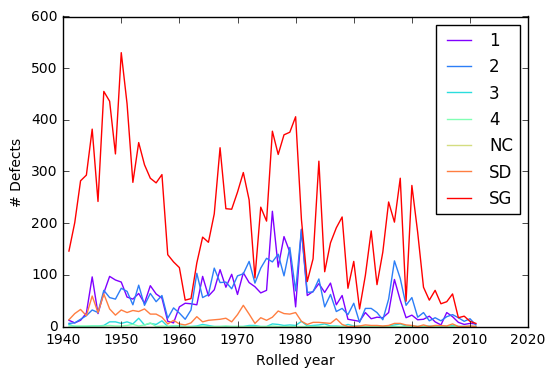

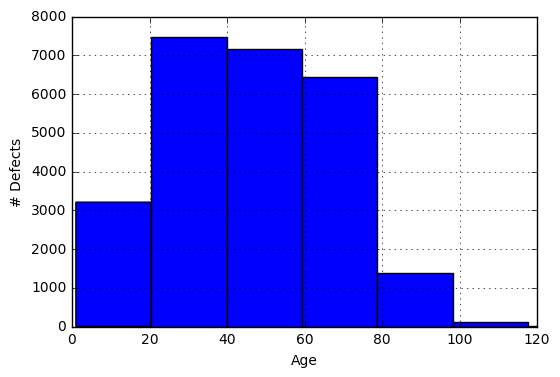

Age 
Mean:  47.6976302951
Variance:  2192.527388
Standard Deviation:  46.8244315288
Max Value:  1946.0
Min Value:  1.0
Missing Values:  606


In [8]:
# Plot 1
tracks = Counter(df.track_type.dropna())
fig, ax = plt.subplots()
ax.bar(range(len(tracks)), tracks.values(), color="blue")
ax.set_xticklabels(tracks.keys())
ax.set_xlabel("Track Type")
ax.set_ylabel("# Defects")
plt.show()

# Plot 2
grouped_data = df.groupby(["rolled_year", "track_type"])["track_type"].count()
dim_levels = grouped_data.keys().levels
years = [y for y in dim_levels[0] if y > 1940]
tracks = dim_levels[1]
colors = cm.rainbow(np.linspace(0, 1, len(tracks)))

fig, ax = plt.subplots()
for color, t in zip(colors, tracks):
    ax.plot(years, [grouped_data[yr].get(t, 0) for yr in years], color=color, label=t)
ax.legend()
ax.set_xlabel("Rolled year")
ax.set_ylabel("# Defects")
plt.show()

# Plot 3
fig, ax = plt.subplots()
age = df.age.dropna().sort_values()
age.hist(ax=ax, bins=100)
ax.set_xlim(0, 120)
ax.set_xlabel("Age")
ax.set_ylabel("# Defects")
plt.show()

print "Age \n==================="
print "Mean: ", df.age.mean()
print "Variance: ", df.age.var()
print "Standard Deviation: ", df.age.std()
print "Max Value: ", df.age.max()
print "Min Value: ", df.age.min()
print "Missing Values: ", len(df.age) - age.count()



## Notes

- Sections with SG track have most defects. Because SG is used more than others?

- There was a slight increase in defects in 1 & 2 tracks between 1970-90's

- Sections of 80-90 age have less defects. Because most of 80-90s were already replaced with new ones?

- Average age of a section with defect: ~47 years

- **Outliers: 1946. This number might effect the mean..**

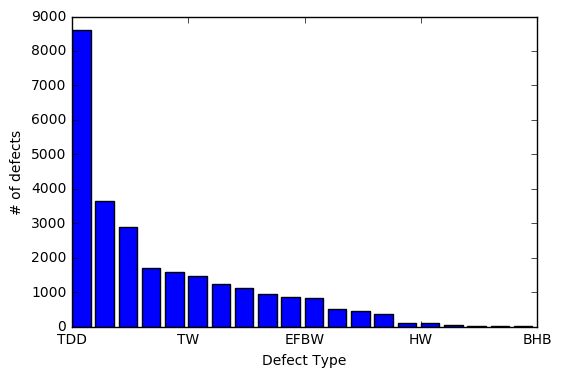

In [9]:
# Defect Type: Defects in rail sections

defects = Counter(df.defect_type.dropna())
sorted_defects = sorted(defects, key=defects.get, reverse=True)

fig, ax = plt.subplots()
ax.bar(range(len(sorted_defects)), [defects[i] for i in sorted_defects], color="blue")
ax.set_xlabel("Defect Type")
ax.set_ylabel("# of defects")
ax.set_xticklabels(sorted_defects)
plt.show()


## Most common defects

In [10]:
table = [ [count+1, d, defects[d]] for count, d in enumerate(sorted_defects) if count < 8]
headers = ["#", "Defect", "Count"]
print tabulate(table, headers=headers, tablefmt="grid")

+-----+----------+---------+
|   # | Defect   |   Count |
+=====+==========+=========+
|   1 | TDD      |    8594 |
+-----+----------+---------+
|   2 | TW       |    3642 |
+-----+----------+---------+
|   3 | EFBW     |    2883 |
+-----+----------+---------+
|   4 | HW       |    1691 |
+-----+----------+---------+
|   5 | BHB      |    1579 |
+-----+----------+---------+
|   6 | SD       |    1478 |
+-----+----------+---------+
|   7 | VSH      |    1230 |
+-----+----------+---------+
|   8 | HSH      |    1128 |
+-----+----------+---------+


## Least common defects

In [11]:
bottom_sorted_defects = sorted(defects, key=defects.get)
table = [ [count+1, d, defects[d]] for count, d in enumerate(bottom_sorted_defects) if count < 5]
print tabulate(table, headers=headers, tablefmt="grid")

+-----+----------+---------+
|   # | Defect   |   Count |
+=====+==========+=========+
|   1 | HWJ      |       4 |
+-----+----------+---------+
|   2 | PIPE     |       5 |
+-----+----------+---------+
|   3 | TD       |       8 |
+-----+----------+---------+
|   4 | DR       |      33 |
+-----+----------+---------+
|   5 | TDC      |      98 |
+-----+----------+---------+


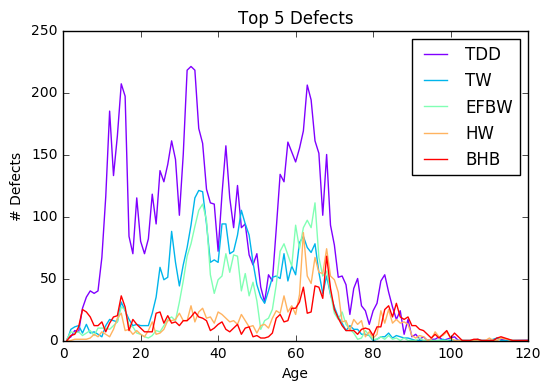

In [12]:
grouped_data = df.groupby(["age", "defect_type"])["defect_type"].count()
dim_levels = grouped_data.keys().levels
ages = dim_levels[0]
defects = [d for c, d in enumerate(sorted_defects) if c < 5]
colors = cm.rainbow(np.linspace(0, 1, len(defects)))

fig, ax = plt.subplots()
for color, d in zip(colors, defects):
    ax.plot(ages, [grouped_data[a].get(d, 0) for a in ages], color=color, label=d)
ax.legend(loc="best")
ax.set_xlabel("Age")
ax.set_ylabel("# Defects")
ax.set_title("Top 5 Defects")
ax.set_xlim(0, 120)
plt.show()

## Notes

- Periods between 40-60 and 60-80 are interesting. There is a slight change in the characteristics. 

- 40-60: TW is more common than TDD

- 60-80: HW is more common than TW; EFBW is more common than TW


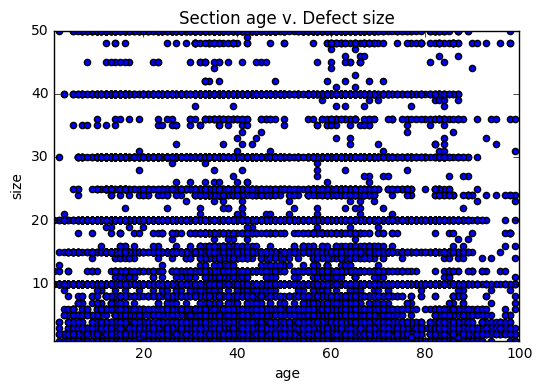

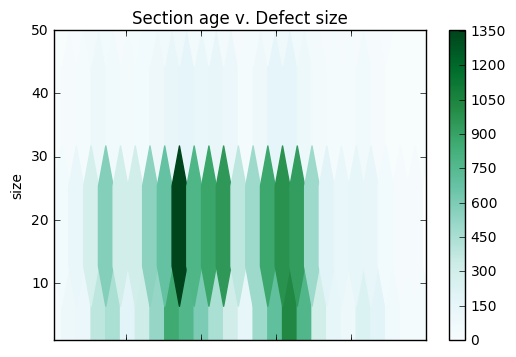

In [13]:
# Consider data with *age* < 100. Anything above that seem to look like error..
from mpl_toolkits.mplot3d import Axes3D

# Filter tail values
df_fil  = df[(df.age < 100) & (df["size"] < 700)]

# How to plot a 3D surface??

ax = df_fil.plot.scatter(x="age", y="size")
ax.set_xlim(1, 100)
ax.set_ylim(1, 50)
ax.set_title("Section age v. Defect size")
plt.show()

ax = df_fil.plot.hexbin(x="age", y="size", gridsize=25)
ax.set_xlim(1, 100)
ax.set_ylim(1, 50)
ax.set_title("Section age v. Defect size")
plt.show()



## Notes

Most defects are between size 10-30 and 30-50 age

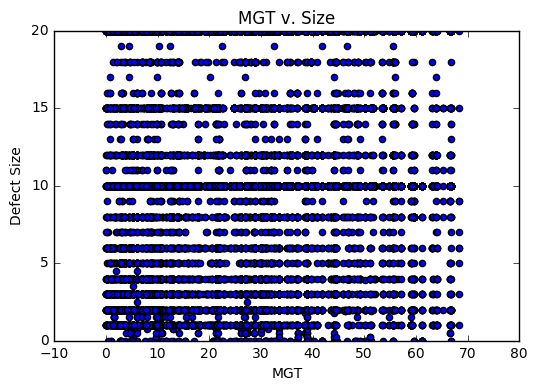

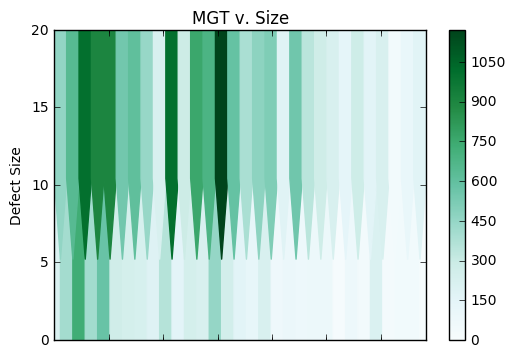

In [15]:
# Ignore extreme values
df_filtered = df[ (df["size"] < 700) & df.mgt.notnull() ]
defects = df_filtered["defect_type"].unique()

ax = df_filtered.plot.scatter(x="mgt", y="size")
ax.set_ylim(0, 20)
ax.set_xlabel("MGT")
ax.set_ylabel("Defect Size")
ax.set_title("MGT v. Size")
plt.show()

ax = df_filtered.plot.hexbin(x="mgt", y="size", gridsize=30)
ax.set_ylim(0, 20)
ax.set_xlabel("MGT")
ax.set_ylabel("Defect Size")
ax.set_title("MGT v. Size")
plt.show()


## Notes

There seems to be no direct linear relationship between MGT and defect size

# Classification of Defect Types

## Can we predict defect type?

In [169]:
#
# Ref:
# a) http://scikit-learn.org/stable/modules/model_evaluation.html
# b) http://scikit-learn.org/stable/auto_examples/calibration/plot_compare_calibration.html
#

def train_and_test(train_data, test_data, clf_class, kw={}, display=False):
    """Train and test a classifier.
    
    Args
        train_data: List of two elements [x array, y array]; training data
        test_data: List of two elements [x array, y array]; testing data 
        clf_class: Classifier class object
        kw: (optional); Key word arguments to be passed to classifier's class object
        display: (optional); Boolean, display result in-line
    
    Returns
        tuple (trained classifier, score)
    """
    # Train
    clf = clf_class(**kw)
    clf.fit(*train_data)
    y_pred = clf.predict(test_data[0])
    
    # Test
    if hasattr(clf, "score"):
        scr = clf.score(*test_data)
    else:
        y_pred = clf.predict(test_data[0])
        scr = 1 - (((test_data[1] != y_pred).sum() * 1.0) / test_data[0].shape[0])
    if display:
        print "{0} score: {1}".format(clf_class.__name__, scr)
    
    return clf, scr

def normalize(df, label):
    """Normalize a numerical column. Updates the column in dataframe object.
    
    Args
        df: Pandas dataframe
        label: Column to be normalized
    
    Returns
        Updated dataframe
    """
    lmax = df[label].max()
    lmin = df[label].min()
    df[label] = df[label].apply(lambda x : (x - lmin) / (lmax - lmin))
    return df;

def str_to_int(df, label):
    """Convert string column to integers.
    
    Args
        df: Pandas dataframe
        label: Column name
        
    Returns
        Updated dataframe
    """
    vmap = {}
    count = 0;
    for v in df[label].unique():
        if pd.isnull(v):
            continue
        vmap[v] = count;
        count += 1
    return df[label].replace(vmap)


def tabulate_scores(clf_score_list, headers=None):
    """Tabulate results in "String" format.
    
    Args
        clf_score_list: List of tuples
        headers: Optional, List of headers
    
    Returns
        None
    """
    headers = headers or ["#", "ML Model", "Score"]
    records = [ [c+1, d[0].__name__, d[1]] for c, d in enumerate(clf_score_list) ]
    print tabulate(records, headers=headers, tablefmt="grid")


from sklearn.calibration import calibration_curve
from matplotlib.font_manager import FontProperties


def plot_reliability_histogram(x_test, clf_list, title=""):
    """
    ref: http://scikit-learn.org/stable/auto_examples/calibration/plot_compare_calibration.html
    """
    fig = plt.figure(figsize=(10, 10))
    ax2 = plt.subplot2grid((3, 1), (2, 0))
    
    for name, clf in clf_list:
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(x_test)[:, 1]
        else:
            prob_pos = clf.decision_function(x_test)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name, histtype="step", lw=2)

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("# Outcomes")
    ax2.set_title(title)
    
    prop = FontProperties()
    prop.set_size('small')
    ax2.legend(loc="upper center", ncol=2, prop=prop)
    plt.tight_layout()
    plt.show()

    
import itertools
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(clf, x_test, y_test, class_names, size=None, title='Confusion matrix'):
    y_pred = clf.predict(x_test)
    cm = confusion_matrix(y_test, y_pred, class_names)
    #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    np.set_printoptions(precision=2)
    
    plt.figure(figsize=size or (10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


def get_df_clf(df):
    """Preprocess the original dataframe and return a copy.
    
    Replace strings with integers. 
    Use this method whenever data needs to be analyzed. 
    """
    # Work on a copy..
    df_clf = df.copy()

    # Joint-weld: replace empty values with NaN
    df_clf[df_clf.joint_weld.eq(" ")] = np.nan

    # Replace strings with integers.. for classification
    df_clf["side"] = str_to_int(df_clf, "side")
    df_clf["joint_weld"] = str_to_int(df_clf, "joint_weld")
    df_clf["track_type"] = str_to_int(df_clf, "track_type")
    df_clf["curve_tang"] = str_to_int(df_clf, "curve_tang")
    
    return df_clf
    

## Approach 1

### SVC, Decision Tree, Random Forest, Bagging, MLP classifiers are applied on the "entire" dataset

- Features: size, weight, mgt, age, track type, curve tang

- Records with empty values in feature columns are ignored

- Extreme values are filtered

- Test sample size: 30%

+-----+------------------------+----------+
|   # | ML Model               |    Score |
+=====+========================+==========+
|   1 | DecisionTreeClassifier | 0.425007 |
+-----+------------------------+----------+
|   2 | RandomForestClassifier | 0.462057 |
+-----+------------------------+----------+
|   3 | BaggingClassifier      | 0.498051 |
+-----+------------------------+----------+
|   4 | MLPClassifier          | 0.394005 |
+-----+------------------------+----------+


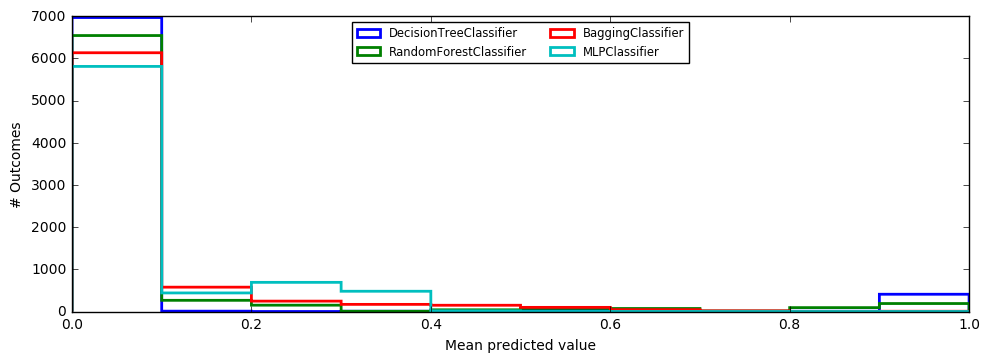

In [25]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Features and labels to perform classification
features = ["size", "weight", "mgt", "age", "track_type", "curve_tang"]
labels = ["defect_type"]

# Create a copy of df (data frame)
df_clf = get_df_clf(df)

# Ignore empty values
df_clf = df_clf.dropna(subset=features + labels)

# Filter extreme values
df_clf = df_clf[(df_clf["size"] < 1000) & (df_clf["age"]) < 100]

# Labels..
df_labels = np.ravel(df_clf[labels].values)
df_features = df_clf[features].values

# Split the data for training and testing..
x_train, x_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=42)

# SVC classification
# svm_clf, svm_score = train_and_test((x_train, y_train), (x_test, y_test), SVC)

# Decision Tree
dt_clf, dt_score = train_and_test((x_test, y_test), (x_train, y_train), DecisionTreeClassifier)

# Random Forest
rf_clf, rf_score = train_and_test((x_test, y_test), (x_train, y_train), RandomForestClassifier, kw={
        "n_estimators": 10})

# Bagging Classifier
bc_clf, bc_score = train_and_test((x_train, y_train), (x_test, y_test), BaggingClassifier, kw={
        "base_estimator": KNeighborsClassifier(), "max_samples": 0.5, "max_features": 0.5},)

# MLP
mlp_clf, mlp_score = train_and_test((x_train, y_train), (x_test, y_test), MLPClassifier, kw={
        "solver": 'lbfgs', "alpha": 1e-5, "hidden_layer_sizes": (5, 2), "random_state": 1})

tabulate_scores([
    #(SVC, svm_score),
    (DecisionTreeClassifier, dt_score),
    (RandomForestClassifier, rf_score),
    (BaggingClassifier, bc_score),
    (MLPClassifier, mlp_score)
])

# Plot the histogram
plot_reliability_histogram(x_test, [
    #(svm.SVC.__name__, svm_clf),
    (DecisionTreeClassifier.__name__, dt_clf),
    (RandomForestClassifier.__name__, rf_clf),
    (BaggingClassifier.__name__, bc_clf),
    (MLPClassifier.__name__, mlp_clf) 
])


## Approach 2

### SVC, Decision Tree, Random Forest, Bagging, MLP classifiers are applied on the "entire" dataset

- **Features: size, mgt, joint weld**

- Records with empty values in feature columns are ignored

- Extreme values are filtered

- Test sample size: 30%

+-----+------------------------+----------+
|   # | ML Model               |    Score |
+=====+========================+==========+
|   1 | DecisionTreeClassifier | 0.613757 |
+-----+------------------------+----------+
|   2 | RandomForestClassifier | 0.611111 |
+-----+------------------------+----------+
|   3 | BaggingClassifier      | 0.603395 |
+-----+------------------------+----------+
|   4 | MLPClassifier          | 0.594136 |
+-----+------------------------+----------+


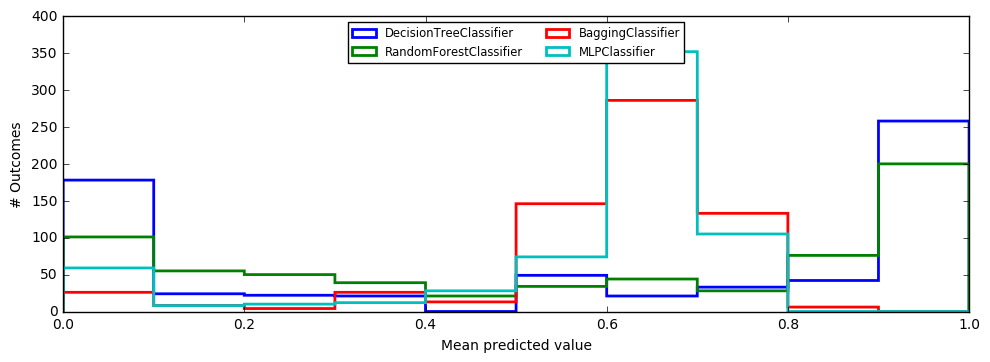

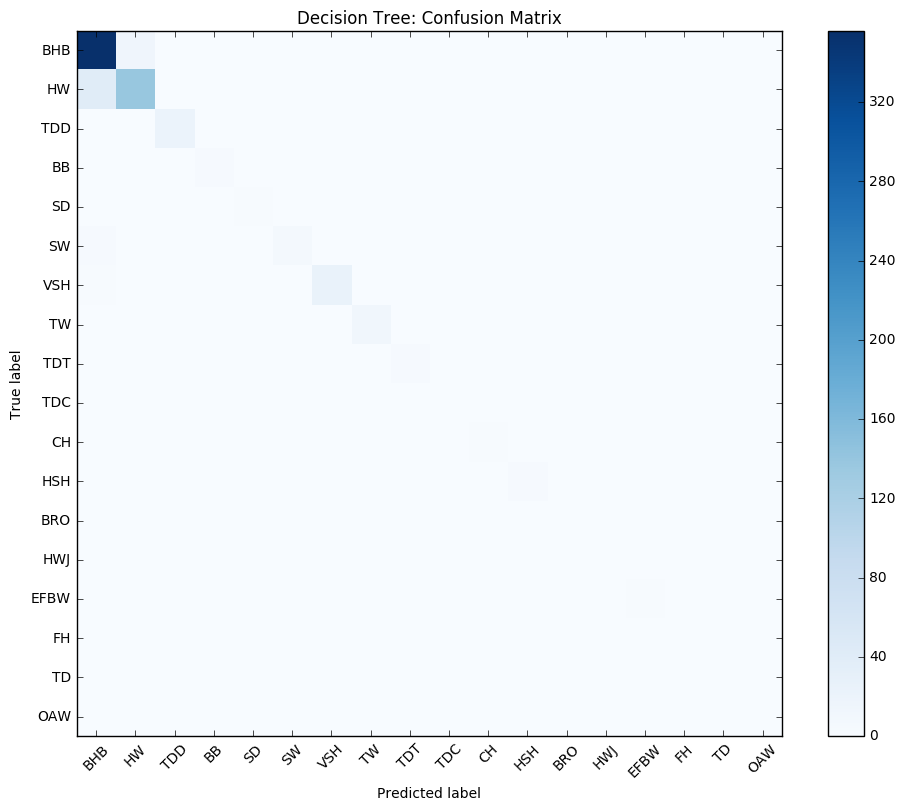

In [38]:
# Features and labels to perform classification
features = ["size", "mgt", "joint_weld"]
labels = ["defect_type"]

# Get the data frame (preprocessed)
df_clf = get_df_clf(df)

# Ignore empty values
df_clf = df_clf.dropna(subset=features + labels)

# Filter extreme values
df_clf = df_clf[(df_clf["size"] < 1000)]

# Labels..
df_labels = np.ravel(df_clf[labels].values)
df_features = df_clf[features].values

# Split the data for training and testing..
x_train, x_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=42)

# SVC classification
# svm_clf, score = train_and_test((x_train, y_train), (x_test, y_test), svm.SVC)

# Decision Tree
dt_clf, dt_score = train_and_test((x_test, y_test), (x_train, y_train), DecisionTreeClassifier)

# Random Forest
rf_clf, rf_score = train_and_test((x_test, y_test), (x_train, y_train), RandomForestClassifier, kw={
        "n_estimators": 10})

# Bagging Classifier
bc_clf, bc_score = train_and_test((x_train, y_train), (x_test, y_test), BaggingClassifier, kw={
        "base_estimator": KNeighborsClassifier(), "max_samples": 0.5, "max_features": 0.5},)

# MLP
mlp_clf, mlp_score = train_and_test((x_train, y_train), (x_test, y_test), MLPClassifier, kw={
        "solver": 'lbfgs', "alpha": 1e-5, "hidden_layer_sizes": (5, 2), "random_state": 1})

tabulate_scores([
    #(SVC, svm_score),
    (DecisionTreeClassifier, dt_score),
    (RandomForestClassifier, rf_score),
    (BaggingClassifier, bc_score),
    (MLPClassifier, mlp_score)
])

# Plot the histogram
plot_reliability_histogram(x_test, [
    #(svm.SVC.__name__, svm_clf),
    (DecisionTreeClassifier.__name__, dt_clf),
    (RandomForestClassifier.__name__, rf_clf),
    (BaggingClassifier.__name__, bc_clf),
    (MLPClassifier.__name__, mlp_clf) 
])

# Plot confusion matrix of decision tree.
plot_confusion_matrix(dt_clf, x_test, y_test, df_clf.defect_type.unique(), title="Decision Tree: Confusion Matrix")

## Notes

- When "joint weld" is used as a feature, there is an increase in classifiers confidence level

- This is probably because there are fewer records (~2400) with joint weld data.

## Approach 3

### Decision Tree classifier applied on dataset grouped by division

- Features: size, weight, mgt, age, track type, curve tang

- Records with empty values in feature columns are ignored

- Extreme values are filtered

- Test sample size: 30%

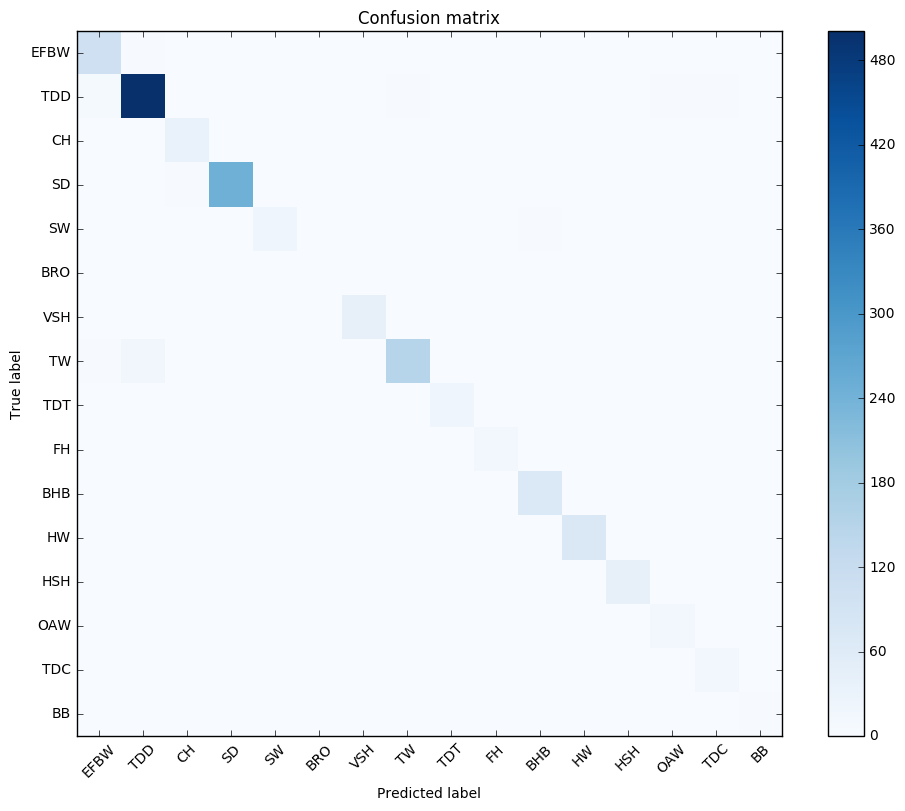

Decision Tree Classifier: 

+------------+-----------+----------+
| Division   |   Records |    Score |
+============+===========+==========+
| AP         |      4623 | 0.502163 |
+------------+-----------+----------+
| AT         |      2150 | 0.453821 |
+------------+-----------+----------+
| AY         |      1658 | 0.427586 |
+------------+-----------+----------+
| BA         |      1430 | 0.514486 |
+------------+-----------+----------+
| CG         |      1334 | 0.35477  |
+------------+-----------+----------+
| FL         |      3803 | 0.420361 |
+------------+-----------+----------+
| GL         |      2285 | 0.378987 |
+------------+-----------+----------+
| HU         |      2198 | 0.496749 |
+------------+-----------+----------+
| JX         |      2096 | 0.404908 |
+------------+-----------+----------+
| LO         |      1588 | 0.353735 |
+------------+-----------+----------+
| NS         |      1629 | 0.369298 |
+------------+-----------+----------+


In [42]:
# Features and labels to perform classification
features = ["size", "weight", "mgt", "age", "track_type", "curve_tang"]
labels = ["defect_type"]

df_clf = get_df_clf(df)

# Ignore empty values
df_clf = df_clf.dropna(subset=features + labels)

# Filter extreme values
df_clf = df_clf[(df_clf["size"] < 1000) & (df_clf["age"]) < 100]

def run_per_division(div, df_clf):
    df_clf = df_clf[df_clf["division"] == div]
    
    # Labels..
    df_labels = np.ravel(df_clf[labels].values)
    df_features = df_clf[features].values

    # Split the data for training and testing..
    x_train, x_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=42)

    # Decision Tree
    clf, score = train_and_test((x_test, y_test), (x_train, y_train), DecisionTreeClassifier)
    
    # Plot confusion matrix for "AP" division
    if div == "AP":
        plot_confusion_matrix(clf, x_test, y_test, df_clf.defect_type.unique())
    
    return score

scores = []
for d in df_clf.division.unique():
    scr = run_per_division(d, df_clf.copy())
    scores.append([d, df_clf[df_clf.division==d].division.count(), scr])

print "Decision Tree Classifier: \n"
print tabulate(scores, headers=["Division", "Records", "Score"], tablefmt="grid")


## Approach 4

### Decision Tree classifier applied on AP division dataset

- Features: size, weight, mgt, age

- Records with empty values in feature columns are ignored

- Extreme values are filtered

- Test sample size: 30%

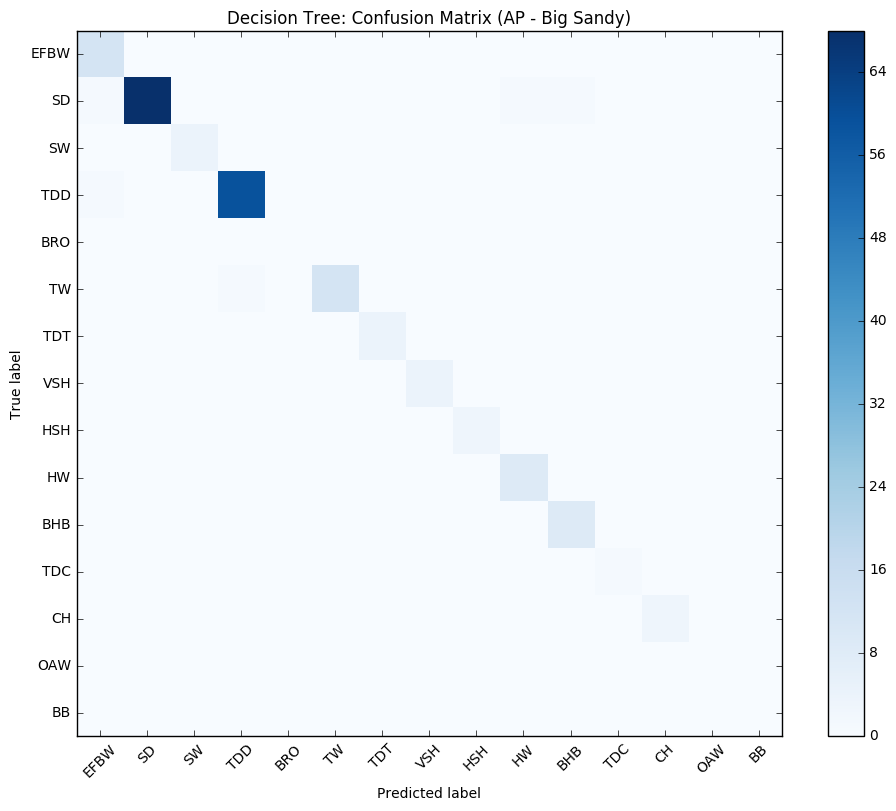

Decision Tree: 

+------------+-------------------+----------+
| Division   | Sub Division      |    Score |
+============+===================+==========+
| AP         | Cumberland Valley | 0.445344 |
+------------+-------------------+----------+
| AP         | Big Sandy         | 0.556793 |
+------------+-------------------+----------+


In [49]:
# Features and labels to perform classification
features = ["size", "weight", "mgt", "age"]
labels = ["defect_type"]

df_clf = get_df_clf(df)

# Ignore empty values
df_clf = df_clf.dropna(subset=features + labels)

# Filter extreme values
df_clf = df_clf[(df_clf["size"] < 1000) & (df_clf["age"]) < 100]

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')


# Number of records for each divison & sub-division.
# df_clf = df_clf.groupby(["division", "sub_division"]).filter(lambda x : len(x) >= 700)
# print df_clf.count()
# print_full(df_clf)
#
# print df_clf.division.unique()
# print df_clf.sub_division.unique()

def run_per_sub_division(df_clf, div, sub_div):
    df_clf = df_clf[(df_clf.division == div) & (df_clf.sub_division == sub_div)]
    
    # Labels..
    df_labels = np.ravel(df_clf[labels].values)
    df_features = df_clf[features].values

    # Split the data for training and testing..
    x_train, x_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=42)

    # Decision Tree
    clf, score = train_and_test((x_test, y_test), (x_train, y_train), DecisionTreeClassifier)
    
    # Plot confusion matrix
    if div == "AP" and sub_div == "BIG SANDY":
        plot_confusion_matrix(clf, x_test, y_test, df_clf.defect_type.unique(),
                              title="Decision Tree: Confusion Matrix (AP - Big Sandy)")

    return score

scores = [
    ("AP", "Cumberland Valley", run_per_sub_division(df_clf, "AP", "CUMBERLAND VALLEY")),
    ("AP", "Big Sandy", run_per_sub_division(df_clf, "AP", "BIG SANDY"))

]

print "Decision Tree: \n"
print tabulate(scores, headers=["Division", "Sub Division", "Score"], tablefmt="grid")

## Approach 5

### A decision tree classifier is modeled for each defect type. The idea is to eliminate defects not predicting.


- **Class label: defect or no-defect. Binary classification**

- **Features: size, weight, mgt, age**

- Records with empty values in feature columns are ignored

- Extreme values are filtered

- Test sample size: 30%

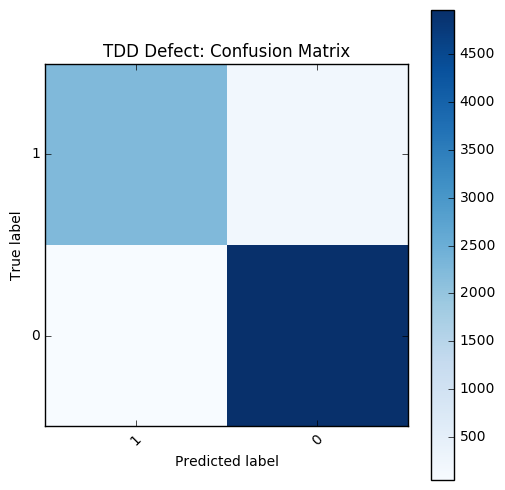

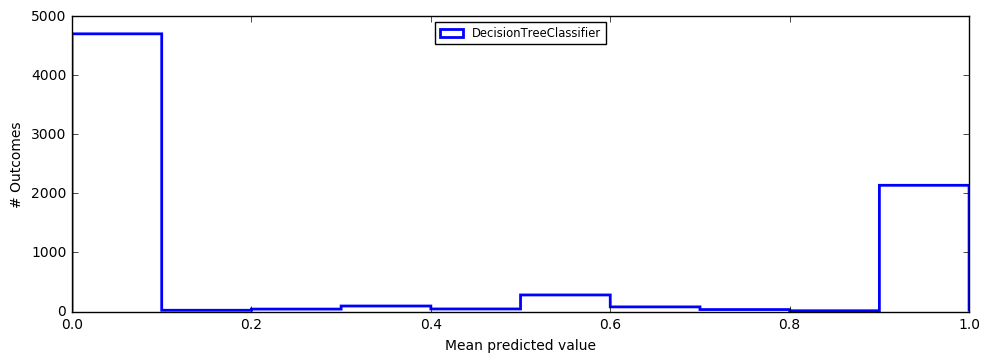

+-----------------------------+----------+
| Class Label (Defect Type)   |    Score |
+=============================+==========+
| BRO                         | 0.994643 |
+-----------------------------+----------+
| EFBW                        | 0.840226 |
+-----------------------------+----------+
| TDD                         | 0.716968 |
+-----------------------------+----------+
| CH                          | 0.957148 |
+-----------------------------+----------+
| SD                          | 0.934627 |
+-----------------------------+----------+
| SW                          | 0.96262  |
+-----------------------------+----------+
| VSH                         | 0.940963 |
+-----------------------------+----------+
| TW                          | 0.807223 |
+-----------------------------+----------+
| TDT                         | 0.986637 |
+-----------------------------+----------+
| FH                          | 0.955189 |
+-----------------------------+----------+
| BHB      

In [57]:
# Get a copy of pre-processed dataframe (DF)
df_clf = get_df_clf(df)

# Filter extreme values
df_clf = df_clf[(df_clf["size"] < 1000) & (df_clf["age"]) < 100]

# Unique class labels (defect type)
defect_types = df_clf.defect_type.dropna().unique()

def run_per_defect(df, defect):
    # labels..
    label = "bin_defect_type"
    features = ["size", "weight", "mgt", "age"]
    
    # Make defect type as binary label
    # 1 := Defect 
    # 0 := No-Defect
    df[label] = df.defect_type == defect
    df[label] = [int(i) for i in df[label]]
    
    # Ignore empty values
    df = df.dropna(subset=features+[label])
    
    # data..
    df_labels = np.ravel(df[label].values)
    
    df_features = df[features].values
    
    # Split the data for training and testing..
    x_train, x_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=42)

    # Decision Tree
    clf, score = train_and_test((x_test, y_test), (x_train, y_train), DecisionTreeClassifier)
    
    
    # Confusion matrix and reliability hist for a defect - classifier
    if defect == "TDD":
        plot_confusion_matrix(clf, x_test, y_test, [1, 0], size=(5,5), title="TDD Defect: Confusion Matrix")
        plot_reliability_histogram(x_test, [
            (DecisionTreeClassifier.__name__, clf),
        ])

    return clf, score
    

scores = []
clf_list = {}
for d in defect_types:
    clf, scr = run_per_defect(df_clf, d)
    scores.append([d, scr])
    clf_list[d] = clf

print tabulate(scores, headers=["Class Label (Defect Type)", "Score"], tablefmt="grid")


## Given a record, let's shortlist defects

In [107]:
def shortlist_defects(clf_list, x_test, y_test):
    """Shortlist defects.
    
    Args
        clf_list: List of binary classifiers (trained above)
        record: A record in the dataset
    """
    shortlist = {}
    length = len(x_test)
    for i in xrange(length):
        for defect, clf in clf_list.items():
            # Predict defect
            x = x_test[i]
            y_pred = clf.predict([x])

            # Store predicted defect
            if shortlist.get(i) is None:
                shortlist[i] = []
            if y_pred == 1:
                shortlist[i].append(defect)
    
    # Accuracy
    accuracy = 0   
    records = []
    for i in xrange(length):        
        actual_defect = y_test[i]
        predicted_defects = shortlist.get(i, [])
        contains = actual_defect in predicted_defects
        
        if contains:
            accuracy += 1

        # Tabulate results. Just top 20.
        if i < 20:
            records.append([i+1, actual_defect, ", ".join(predicted_defects), contains])

    print "Accuracy: ", accuracy / (length * 1.0)
    print "Sample Output \n"
    print tabulate(records, 
                   headers=["Test Record", "Actual Defect", "Shortlisted Defects", "Contains Actual Defect"], 
                   tablefmt="grid")
    

# Get a copy of pre-processed dataframe (DF)
df_clf = get_df_clf(df)

# Filter extreme values
df_clf = df_clf[(df_clf["size"] < 1000) & (df_clf["age"]) < 100]

# Filter empty values
features = ["size", "weight", "mgt", "age"]
labels = ["defect_type"]
df = df.dropna(subset=features + labels)

# Pick a record at random
df_labels = np.ravel(df[labels].values)
df_features = df[features].values
x_train, x_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=42)

# Demo..
shortlist_defects(clf_list, x_test, y_test)

Accuracy:  0.56200212427
Sample Output 

+---------------+-----------------+-----------------------+--------------------------+
|   Test Record | Actual Defect   | Shortlisted Defects   | Contains Actual Defect   |
+===============+=================+=======================+==========================+
|             1 | TDD             | TDD                   | True                     |
+---------------+-----------------+-----------------------+--------------------------+
|             2 | TW              | TW                    | True                     |
+---------------+-----------------+-----------------------+--------------------------+
|             3 | TDD             | TDD                   | True                     |
+---------------+-----------------+-----------------------+--------------------------+
|             4 | CH              | CH                    | True                     |
+---------------+-----------------+-----------------------+--------------------------+
| 

## Notes

- Check if the data split is correct 

- Initially, the classifier is expected to be used for eliminating defects.. but these results are quite different!

## Approach 6

### Decision tree applied on a subsets grouped by defects

- Subset 1: Records having Transverse defects (TD, TDC, TDD, TDT)
- Subset 2: Records having Bolt defects (BB, BHB, BRO)
- Subset 3: Records having Weld defects (HW, HWJ, OAW, SW)

Decision Tree:  0.931004366812


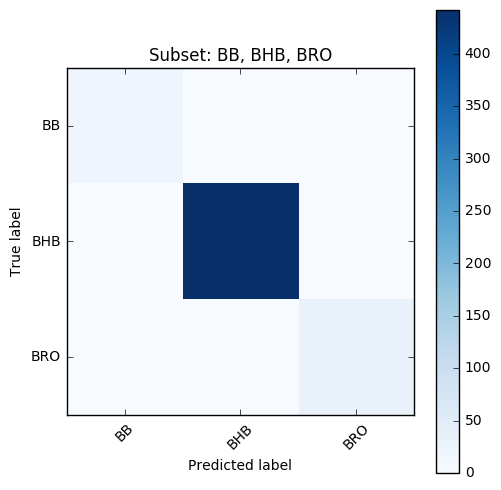

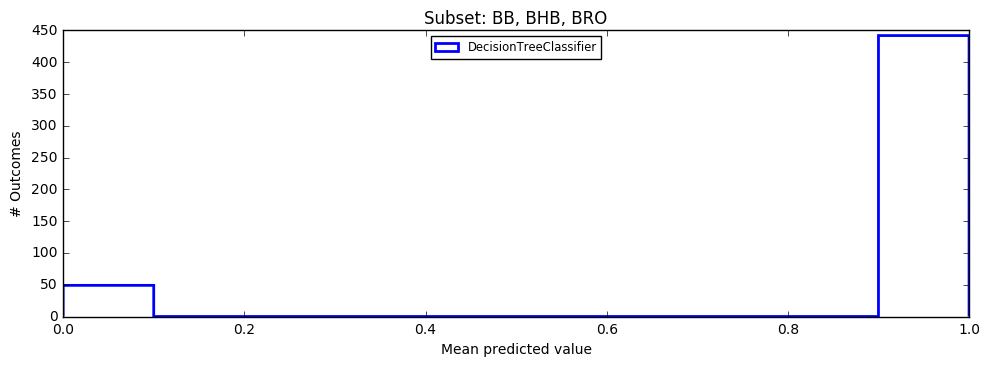

In [196]:
def run_per_supergroup(df_clf, group, display=False):
    
    # Filter extreme values
    df_clf = df_clf[(df_clf["size"] < 1000) & (df_clf["age"]) < 100]

    # Select records that are in "group" list
    df_clf = df_clf[df.defect_type.isin(group)]

    # Labels..
    labels = ["defect_type"]
    features = ["size", "mgt", "age"]

    # Ignore empty values
    df_clf = df_clf.dropna(subset=features)
        
    df_labels = np.ravel(df_clf[labels].values)
    df_features = df_clf[features].values

    # Split the data for training and testing..
    x_train, x_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=42)
    
    # Decision Tree
    dt_clf, dt_score = train_and_test((x_test, y_test), (x_train, y_train), DecisionTreeClassifier)
    
    if display:
        print "Decision Tree: ", dt_score
        title = "Subset: " + ", ".join(group)
        plot_confusion_matrix(dt_clf, x_test, y_test, group, size=(5,5), title=title)
        plot_reliability_histogram(x_test, [ (DecisionTreeClassifier.__name__, dt_clf) ], title=title)

    return dt_clf, dt_score


# Transverse - Classifier for Transferse defects
t_clf, t_score = run_per_supergroup(get_df_clf(df), ["TD", "TDC", "TDD", "TDT"])

# Bolt - Classifier for Bolt defects
b_clf, b_score = run_per_supergroup(get_df_clf(df), ["BB", "BHB", "BRO"], True)

# Weld - Classifier for weld defects
w_clf, w_score = run_per_supergroup(get_df_clf(df), ["HW", "HWJ", "OAW", "SW"])

# Map defect group v. Classifier
group_clf_list = {
    
    "T" : t_clf,
    "B" : b_clf,
    "W" : w_clf
}



## Notes

- Certainly these are better results. However, are these causal? 


### Defects are grouped into defect-groups. Decision tree is applied on the entire dataset using defect-groups.

The intuition behind this approach is that
    - Defects *might* have different physical properties
    - Defects *might* have occurred due to different reasons
    - We could group defects based on some common physical relationship


- **Class label: A {A1, A2, A3..}, B {B1, B2, ...}, C {C1, C2, ..}**

- **Features: size, weight, mgt, age** [Let's play around these..]

- Records with empty values in feature columns are ignored

- Extreme values are filtered

- Test sample size: 30%

Classification confidence level:  0.80294438386


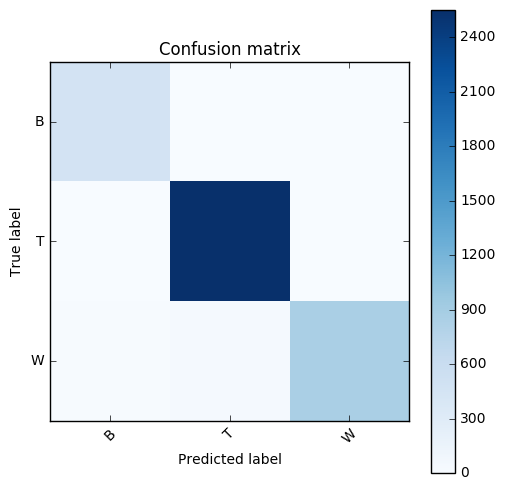

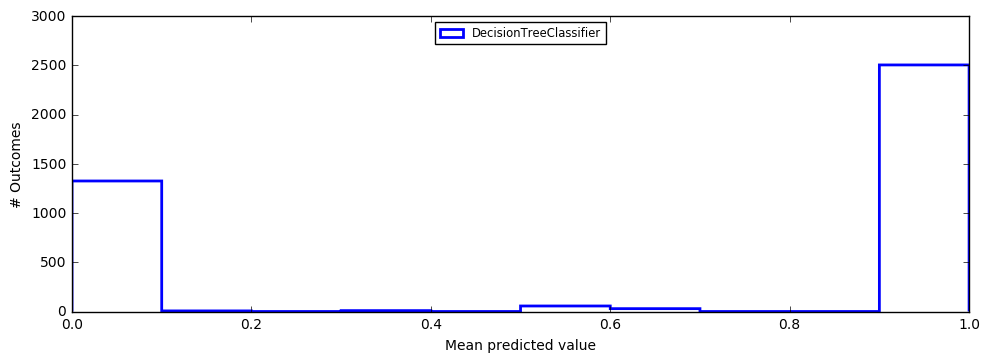

In [166]:
# Contains mapping for each defect type in the dataset.
# Key   := Defect Type
# Value := Defect Group (must be unique)
defect_groups_map = {
    
    # Transverse
    "TDD"   : "T",
    "TDC"   : "T",
    "TD"    : "T",
    "TDT"   : "T",
    
    # Bolt
    "BRO"   : "B",
    "BHB"   : "B",
    "BB"    : "B",
    
    # Weld
    "HW"    : "W",
    "HWJ"   : "W",
    "OAW"   : "W",
    "SW"    : "W",
    
    # Shell
#     "SD"    : "H",
    
    # Vertical Split, Logitudnial - Horizontal split.
#     "VSH"   : "S",
#     "HSH"   : "S",
    
    # Thermite
#     "TW"    : "R",
    
    # Crushed head
#    "CH"    : "C",
    
#     # Unknown
#     "FH"    : "F",
#     "PIPE"  : "P",
#     "DR"    : "D",
#     "EFBW"  : "W",
    
}


# Get a copy of pre-processed dataframe (DF)
df_clf = get_df_clf(df)

# Filter extreme values
df_clf = df_clf[(df_clf["size"] < 1000) & (df_clf["age"]) < 100]

# Create a new super-group column
# NOTE: Ignore defects that are not mapped. This is helpful when we want to group
# only a subset of defects and ignore remaining..
df_clf["defect_group"] = [defect_groups_map.get(i, np.nan) for i in df_clf.defect_type]

# Features, labels
features = ["size", "mgt", "age"]
labels = ["defect_group"]

# Ignore empty values
df_clf = df_clf.dropna(subset=features+labels)

# data..
df_labels = np.ravel(df_clf[labels].values)
df_features = df_clf[features].values

# Split the data for training and testing..
x_train, x_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=42)

# Decision Tree
clf, score = train_and_test((x_test, y_test), (x_train, y_train), DecisionTreeClassifier)

# (SVC, svm_score),
# (DecisionTreeClassifier, dt_score),
# (RandomForestClassifier, rf_score),
# (BaggingClassifier, bc_score),
# (MLPClassifier, mlp_score)

print "Classification confidence level: ", score

unique_defects = set(defect_groups_map.values())
plot_confusion_matrix(clf, x_test, y_test, list(unique_defects), size=(5,5))

plot_reliability_histogram(x_test, [
    (DecisionTreeClassifier.__name__, clf),
])

## Pipeline

1. Predict the defect-group using the above classifier
2. If the predicted group is "G", apply the record on the classifier trained specifically on "G" group defects

In [241]:
def pipeline(group_clf, clf_list, x_test, y_test):
    #
    # x_test is expected to have "defect_type"
    #
    
    accur = 0
    
    # First predict defect-group
    g_pred = group_clf.predict(x_test[:,:-1])
    
    # Tabulate results
    records = []
    
    # For each predicted group, apply defect classifier
    for i, g in enumerate(g_pred):
        
        # Predict defect
        d_pred = clf_list[g].predict([x_test[i, :-1]])[0]
        
        # Check if the predicted defect is correct
        d_real = x_test[i, -1]
        if d_pred == d_real:
            accur += 1
            
        # Tablulate top 20..
        if i < 20:
            records.append([i+1, y_test[i], g, d_real, d_pred])
    
    print "Accuracy: ", accur / (1.0 * len(x_test))
    
    headers = ["#", "Defect Group", "Predicted Group", "Defect", "Predicted Defect"]
    print tabulate(records, headers=headers, tablefmt="grid")

# data..
df_labels = np.ravel(df_clf[labels].values)
df_features = df_clf[features + ["defect_type"]].values

# Split the data for training and testing..
_, x_test, _, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=42)

pipeline(clf, group_clf_list, x_test, y_test )

Accuracy:  0.902314932587
+-----+----------------+-------------------+----------+--------------------+
|   # | Defect Group   | Predicted Group   | Defect   | Predicted Defect   |
+=====+================+===================+==========+====================+
|   1 | T              | T                 | TDD      | TDD                |
+-----+----------------+-------------------+----------+--------------------+
|   2 | T              | T                 | TDD      | TDD                |
+-----+----------------+-------------------+----------+--------------------+
|   3 | T              | T                 | TDD      | TDD                |
+-----+----------------+-------------------+----------+--------------------+
|   4 | T              | T                 | TDD      | TDD                |
+-----+----------------+-------------------+----------+--------------------+
|   5 | T              | T                 | TDD      | TDD                |
+-----+----------------+-------------------+------

## Notes

- This is interesting!! Need to discuss